Extracting Data

In [ ]:
import pandas as pd
file = "http://www.cs.cornell.edu/people/pabo/movie-review-data/scale_data.tar.gz"
!pip install wget
import wget
wget.download(file)
import tarfile

tf = tarfile.open("scale_data.tar.gz")
file = tf.extractall(r"/content/C:\Users\16197\Documents\NLP week 3")

Importing all Required Libraries

In [ ]:
import tarfile
import os
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
punctuations= string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support,log_loss
from sklearn.linear_model import Lasso, SGDClassifier,LogisticRegression as LR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.svm import SVC
import seaborn as sns
import pylab as pl


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
data_dir = r'/content/C:\Users\16197\Documents\NLP week 3/scaledata'
labels, cleaned_documents = [], []
for dr in os.listdir(data_dir):
    path1 = data_dir + '/' + dr
    for doc_name in os.listdir(path1):
      file_path = path1 + '/' + doc_name
      if re.findall('subj',file_path) != []:
        with open(file_path, encoding='utf8', errors='ignore') as f:
          doc = f.read()
        cleaned_documents.append(doc)
      elif re.findall('label.3class',file_path) != []:
        with open(file_path, encoding='utf8', errors='ignore') as f:
          string = f.read()
        labels.append(string)
      #break
for i in range(len(cleaned_documents)):
  df1 = pd.DataFrame({'text': cleaned_documents[i].split('\n'),'label':labels[i].split('\n')[:len(cleaned_documents[i])]})
  #df= df.append(df)
  break
df1.head()

,text,label
0,"in my opinion , a movie reviewer's most import...",0
1,"you can watch this movie , that is based on a ...",0
2,"this is asking a lot to believe , and though i...",0
3,no heroes and no story are the main attributes...,0
4,"this is not an art movie , yet i saw it an art...",0


1. What is the default loss function used in the SGD classifier? https://scikit-learn.org/stable/modules/sgd.html#sgd
2. As in the other assignments, create a single dataset for classification based on the IDs available. An example ID name is "id.Dennis+Schwartz". The data file is "subj.Dennis+Schwartz". The ratings file is "rating.Dennis+Schwartz". The ratings are converted to 3 classes as described in the README file.

In [ ]:
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Dennis+Schwartz/subj.Dennis+Schwartz') as f:
    doc = f.read()
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Dennis+Schwartz/label.3class.Dennis+Schwartz', encoding='utf8', errors='ignore') as f:
    c3 = f.read()
df1 = pd.DataFrame({'text': doc.split('\n'),'label':c3.split('\n')[:len(doc.split('\n'))]})
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/James+Berardinelli/subj.James+Berardinelli') as f:
    doc = f.read()
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/James+Berardinelli/label.3class.James+Berardinelli', encoding='utf8', errors='ignore') as f:
    c3 = f.read()
df2 = pd.DataFrame({'text': doc.split('\n'),'label':c3.split('\n')[:len(doc.split('\n'))]})
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Scott+Renshaw/subj.Scott+Renshaw') as f:
    doc = f.read()
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Scott+Renshaw/label.3class.Scott+Renshaw', encoding='utf8', errors='ignore') as f:
    c3 = f.read()
df3 = pd.DataFrame({'text': doc.split('\n'),'label':c3.split('\n')[:len(doc.split('\n'))]})
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Steve+Rhodes/subj.Steve+Rhodes') as f:
    doc = f.read()
with open(r'/content/C:\Users\16197\Documents\NLP week 3/scaledata/Steve+Rhodes/label.3class.Steve+Rhodes', encoding='utf8', errors='ignore') as f:
    c3 = f.read()
df4 = pd.DataFrame({'text': doc.split('\n'),'label':c3.split('\n')[:len(doc.split('\n'))]})
df = pd.concat([df1,df2,df3,df4])
df.replace("", float("NaN"), inplace=True)
df.replace(" ", float("NaN"), inplace=True)
df.dropna(subset = ["label"], inplace=True)
df.head()

,text,label
0,"in my opinion , a movie reviewer's most import...",0
1,"you can watch this movie , that is based on a ...",0
2,"this is asking a lot to believe , and though i...",0
3,no heroes and no story are the main attributes...,0
4,"this is not an art movie , yet i saw it an art...",0


In [ ]:
df.shape

(5006, 2)

In [ ]:
df['label'].value_counts()

1    1915
2    1894
0    1197
Name: label, dtype: int64

In [ ]:
def clean_text(text,stop_words=True):
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    if stop_words==True:
      words = [w for w in words if w not in stopword_list]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text
from nltk import FreqDist
df['text'] = df['text'].apply(clean_text)
words = [word for i in df['text'] for word in i.split()]
print(len(words))
fdist = FreqDist(words)

1023957


splitting the Data into Training and Testing Set 80:20

3. Split the data into training and test datasets (80/20 ratio). Are the labels balanced between training and testing datasets?
4. You can vectorize the documents using a vectorizer of your choice. CountVectorizer is the simplest one that can be used. Set the feature values to binary so that only presence or absence matters.
IMPORTANT: Always look for random_state option and set it to a fixed number of your choice.

In [ ]:
def get_feature_list(x,y,pca=0):
  tfidf_transformer1 = TfidfVectorizer()
  x1= tfidf_transformer1.fit_transform(x)
  feature_array = np.array(tfidf_transformer1.get_feature_names())
  x1 = x1.toarray()
  if pca !=0:
    pcas = PCA(pca).fit(x1)
    x1 = pcas.transform(x1)
  train_x,test_x,train_y,test_y = train_test_split(x1,y, random_state = 56,test_size=0.2,stratify=y)
  return train_x,test_x,train_y,test_y,feature_array
x=df['text']
y=df['label']
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=500)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((4004, 500), (1002, 500), (4004,), (1002,))

In [ ]:
def get_tfidf_top_features(corpus,n_top=10):
  tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words='english')
  tfidf = tfidf_vectorizer.fit_transform(corpus)
  importance_values = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
  tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
  values = [np.mean(i) for i in tfidf.toarray()[::-1]]
  top_features = tfidf_feature_names[importance_values[:n_top]]
  return top_features,importance_values,values

a,importance,k=get_tfidf_top_features(x,n_top=10)
sorted(dict(zip(a, k)).items(), key=lambda x: x[1],reverse=True) 

[('time', 0.0013958759327078855),
 ('like', 0.001368472930319365),
 ('story', 0.001349943361457418),
 ('movie', 0.0012478725760368483),
 ('make', 0.0012267969047380436),
 ('film', 0.0012102276737803088),
 ('picture', 0.0011048185656527634),
 ('character', 0.001064756597328637),
 ('look', 0.001051944253969306),
 ('scene', 0.0009353823637876073)]

In [ ]:
df5 = pd.DataFrame(test_x)
y1=[i for i in  test_y]
df5['labels'] = y1
df5.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,labels
0,-0.070152,-0.012000,-0.041002,-0.063222,0.011679,-0.004869,0.009553,-0.027905,-0.023459,0.017184,-0.029888,-0.003632,0.024782,-0.018248,0.004503,0.015132,0.000723,-0.017303,-0.003114,-0.009737,-0.008511,-0.018196,-0.000662,0.008071,0.028349,-0.009127,0.006890,-0.000654,0.003110,-0.015611,-0.031532,-0.004220,-0.023477,0.005750,-0.036039,0.006367,-0.031131,-0.003078,0.018275,-0.003175,...,-0.032830,-0.000478,-0.027478,0.012070,-0.001363,-0.021424,-0.008338,-0.003187,-0.042811,0.000672,0.003267,-0.002014,-0.037124,-0.010876,0.038412,0.012319,0.015424,0.002363,-0.008633,-0.033591,0.010554,0.019828,0.010162,-0.001141,0.004599,-0.017098,-0.016407,0.023866,0.019900,0.028654,0.005652,-0.010464,-0.005720,-0.008722,0.030867,-0.019058,0.015263,-0.000082,0.007425,2
1,-0.031871,-0.009251,-0.065786,0.061873,-0.061906,0.040687,0.041486,0.048684,-0.010866,0.016708,-0.024241,0.044807,0.030070,-0.030045,0.039030,0.022199,0.002693,-0.011249,-0.021912,0.028854,-0.017027,0.015701,0.004027,-0.000357,-0.045464,0.010590,0.008359,0.014543,-0.003130,-0.005380,0.024462,0.005425,-0.022407,-0.009092,0.006210,0.018399,0.004516,-0.016217,-0.028701,-0.012109,...,-0.005795,0.018966,0.014852,0.004877,-0.003701,0.013409,-0.000399,-0.002444,0.040605,-0.018856,0.024782,-0.008923,-0.008508,0.015877,-0.016044,-0.003777,-0.005276,-0.010955,-0.004919,0.004237,0.011577,-0.004419,0.007379,-0.040335,-0.000461,-0.002960,-0.021753,0.016953,-0.013592,-0.030125,0.016970,0.001697,-0.002721,0.024026,-0.011281,0.018752,0.022309,-0.016884,0.001916,1
2,-0.073061,0.045518,0.008600,-0.028972,0.053429,0.003130,-0.064403,-0.041918,-0.033261,-0.053738,-0.018170,0.005680,-0.035300,0.026764,0.016938,0.003041,0.036471,-0.001173,-0.022253,0.070184,0.035621,0.027253,-0.020790,0.011245,-0.000651,0.016737,-0.010782,0.008889,0.001106,0.005948,-0.038898,0.003012,0.000700,0.013578,-0.038669,0.036994,0.013962,-0.011855,-0.009697,-0.003139,...,-0.005425,-0.047201,-0.019465,0.012820,0.025052,-0.026273,0.014689,0.000268,-0.023919,0.018594,0.000115,-0.009755,-0.021771,-0.020467,-0.035581,-0.021224,0.010154,-0.040035,-0.022989,0.008266,0.011809,0.053831,0.025075,0.006251,0.009365,-0.016055,-0.030003,0.003417,0.044974,0.047637,0.017087,-0.014612,0.001184,-0.036855,-0.005689,-0.022400,0.000693,-0.016413,0.006015,0
3,0.022710,0.012085,-0.057017,0.073921,-0.091811,0.082891,0.088594,0.001855,-0.022508,-0.000379,-0.029960,-0.051424,0.066030,-0.039878,0.019459,0.007016,-0.020436,-0.019973,-0.007014,0.012148,-0.053176,-0.030975,0.034632,0.004644,-0.026536,-0.000261,-0.022850,0.042178,-0.003845,-0.026072,-0.007871,-0.024164,0.010509,-0.002405,-0.005289,0.076876,0.046842,-0.056034,-0.035293,-0.070520,...,-0.002031,-0.015586,-0.035727,-0.035079,-0.015282,-0.015251,0.023529,0.035837,0.001088,-0.021807,0.010332,0.012466,-0.016825,0.011283,-0.029107,0.019862,0.009789,-0.021428,0.020036,-0.020521,-0.016037,0.009628,-0.004411,0.015666,-0.011463,0.010861,0.009263,0.027747,0.026588,-0.023450,-0.006155,-0.045496,0.007689,0.001118,0.008642,0.002167,-0.006367,0.004545,-0.002700,1
4,0.045642,-0.034023,0.038108,-0.002828,-0.063109,0.039769,0.004979,0.049969,-0.003518,0.058817,-0.038703,-0.076162,0.062855,0.049717,-0.073437,-0.011102,-0.004255,-0.024808,0.019987,0.033913,0.051731,0.015560,-0.090412,-0.009813,0.032385,-0.005832,0.005749,0.029404,0.021425,0.021619,0.101922,0.003199,-0.017022,0.001084,-0.043769,-0.000913,0.043812,-0.020607,-0.021782,-0.000805,...,0.003176,0.010272,-0.001548,-0.002164,-0.028521,-0.008196,-0.004188,-0.021109,0.013744,-0.000770,-0.014964,-0.028782,-0.007354,0.014429,0.016363,-0.019593,0.016842,-0.003240,0.009400,-0.008221,-0.046026,-0.031594,0.014892,-0.004070,-0.029663,0.012067,-0.020141,-0.006840,0.026652,0.013273,-0.0

5. Now answer the following questions for the model classification:
What is the performance of the trained classifier on the test dataset?
Which regularization is performing the best on the test dataset: L1 or L2? Use the default settings.
We will use cross-validation to get the best value of the α parameter for regularization. What is the value of the α? Is regularization important? You can use 5-fold cross validation. Note that the cross-validation should be used ONLY on the training dataset. You can read more here: https://scikit-learn.org/stable/modules/grid_search.html# (Links to an external site.)
What kind of multi-class strategy does SGDClassifier use?
In any regularization: which features are ranked the highest? You can sort the feature weights.
How does the hyperplane of the classifier look like? 
Choose a different loss function. The default option is "hinge". Now train and test the different classifier to compare against the default one. Is it better or worse?

**SGD with Loss**

In [ ]:
def confuson_matrices(y, yp):
  #k = sorted(y.unique())
  k = sorted(list(set(y)))
  df = pd.DataFrame(index=k, columns=k)
  df.fillna(0, inplace=True)
  for i, j in zip(y, yp):
    df.loc[i, j] += 1
  sns.heatmap(df, annot=True)
  plt.plot()
X_train,y_train,X_test,y_test=train_x,train_y,test_x,test_y
sgd = SGDClassifier(eta0=0.0001, alpha=0.01, loss='log',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='optimal')
sgd.fit(X_train, y_train)
print(f'train accuracy: {sgd.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgd.predict(X_test))
con_matrx = confusion_matrix(y_test,sgd.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgd.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgd.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.514985014985015
The accuracy of the model is : 51.1 %
Confusion Matrix:
 [[  0 234   6]
 [  0 342  41]
 [  0 209 170]]
Precision =  0.4628 
Recall =  0.511 
F-Score =  0.4396


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

parameter_grid = {'alpha' : [0.0001,0.001,0.01,0.1,1,10],'penalty':['l2','elasticnet'],'learning_rate':['optimal','adaptive','invscaling','constant']}
gridsearch = GridSearchCV(estimator=sgd, param_grid=parameter_grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
gm = gridsearch.best_estimator_
print('Best Parameters: ', gridsearch.best_params_)
gm.fit(X_train,y_train)
gm.score(X_test,y_test)

Best Parameters:  {'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'elasticnet'}


0.6666666666666666

In [ ]:
parameter_grid = {'alpha' : [0.0001,0.001,0.01,0.1,1,10],'penalty':['l2','elasticnet']}
gridsearch = GridSearchCV(estimator=sgd, param_grid=parameter_grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
gse = gridsearch.best_estimator_
print('Best Parameters: ', gridsearch.best_params_)
gse.fit(X_train,y_train)
gse.score(X_test,y_test)

Best Parameters:  {'alpha': 0.0001, 'penalty': 'l2'}


0.38223552894211577

train accuracy: 0.4157029823493609
The accuracy of the model is : 41.6 %
Confusion Matrix:
 [[  0 287   0]
 [  0 342   0]
 [  0 193   0]]
Precision =  0.1731 
Recall =  0.4161 
F-Score =  0.2445


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


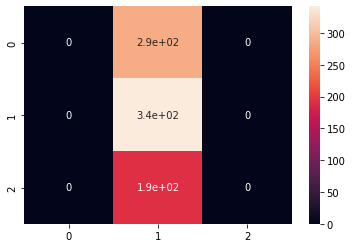

In [ ]:
sgd1 = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='optimal')
sgd1.fit(X_train, y_train)
print(f'train accuracy: {sgd1.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgd1.predict(X_test))
con_matrx = confusion_matrix(y_test,sgd1.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgd1.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgd1.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, sgd1.predict(X_test))

**SGD with Hinge**

In [ ]:
sgd = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='hinge',random_state=15, penalty='l2', tol=1e-3,learning_rate='constant')
sgd.fit(X_train, y_train)
print(f'train accuracy: {sgd.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgd.predict(X_test))
con_matrx = confusion_matrix(y_test,sgd.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgd.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgd.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.82288496652465
The accuracy of the model is : 78.8 %
Confusion Matrix:
 [[258  27   2]
 [ 45 290   7]
 [  8  85 100]]
Precision =  0.8052 
Recall =  0.7883 
F-Score =  0.7811


In [ ]:
parameter_grid = {'alpha' : [0.0001,0.001,0.01,0.1,1,10],'penalty':['l2','elasticnet']}
gridsearch = GridSearchCV(estimator=sgd, param_grid=parameter_grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
gse = gridsearch.best_estimator_
print('Best Parameters: ', gridsearch.best_params_)
gse.fit(X_train,y_train)
gse.score(X_test,y_test)

Best Parameters:  {'alpha': 1, 'penalty': 'l2'}


0.8126520681265207

train accuracy: 0.8545343883140597
The accuracy of the model is : 81.3 %
Confusion Matrix:
 [[272  13   2]
 [ 75 254  13]
 [ 15  36 142]]
Precision =  0.8235 
Recall =  0.8127 
F-Score =  0.8109


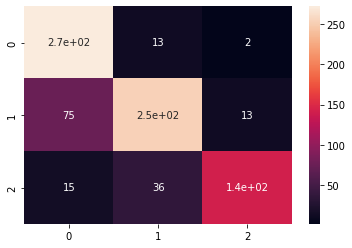

In [ ]:
sgdh = SGDClassifier(eta0=0.0001, alpha=1, loss='hinge',random_state=15, penalty='l2', tol=1e-3,learning_rate='constant')
sgdh.fit(X_train, y_train)
print(f'train accuracy: {sgdh.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgdh.predict(X_test))
con_matrx = confusion_matrix(y_test,sgdh.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgdh.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgdh.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, sgdh.predict(X_test))

**SGD with Perceptron**

In [ ]:
sgd = SGDClassifier(eta0=0.0001, alpha=1, loss='perceptron',random_state=15, penalty='l2', tol=1e-3,learning_rate='constant')
sgd.fit(X_train, y_train)
print(f'train accuracy: {sgd.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgd.predict(X_test))
con_matrx = confusion_matrix(y_test,sgd.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgd.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgd.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.9111381618989653
The accuracy of the model is : 85.9 %
Confusion Matrix:
 [[272  15   0]
 [ 35 302   5]
 [ 14  47 132]]
Precision =  0.8673 
Recall =  0.8589 
F-Score =  0.8562


In [ ]:
parameter_grid = {'alpha' : [0.0001,0.001,0.01,0.1,1,10],'penalty':['l2','elasticnet']}
gridsearch = GridSearchCV(estimator=sgd, param_grid=parameter_grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
gse = gridsearch.best_estimator_
print('Best Parameters: ', gridsearch.best_params_)
gse.fit(X_train,y_train)
gse.score(X_test,y_test)

Best Parameters:  {'alpha': 0.0001, 'penalty': 'elasticnet'}


0.9197080291970803

train accuracy: 0.9494826536822885
The accuracy of the model is : 92.0 %
Confusion Matrix:
 [[281   6   0]
 [ 11 283  48]
 [  0   1 192]]
Precision =  0.9298 
Recall =  0.9197 
F-Score =  0.9197


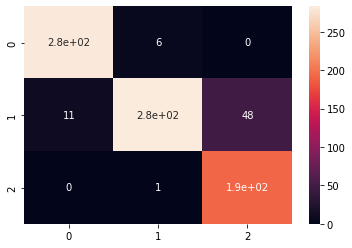

In [ ]:
sgdp = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='perceptron',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='constant')
sgdp.fit(X_train, y_train)
print(f'train accuracy: {sgdp.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, sgdp.predict(X_test))
con_matrx = confusion_matrix(y_test,sgdp.predict(X_test))
c=np.array([[i] for i in np.append(np.array([[i] for i in sgdp.coef_[0]]),[0])])
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,sgdp.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, sgdp.predict(X_test))

**One Step for SGD Params Optimization**

In [ ]:
parameter_grid = {'alpha' : [0.0001,0.001,0.01,0.1,1,10],'penalty':['l1','l2','elasticnet'],'loss':['log','hinge','modified_huber','perceptron'],
                  'learning_rate':['optimal','adaptive','invscaling','constant']}
sgda = SGDClassifier(eta0=0.0001,random_state=15, tol=1e-3)
gridsearch = GridSearchCV(estimator=sgd, param_grid=parameter_grid, scoring='accuracy', cv=5)
gridsearch.fit(X_train,y_train)
gse = gridsearch.best_estimator_
print('Best Parameters: ', gridsearch.best_params_)
gse.fit(X_train,y_train)
gse.score(X_test,y_test)

Best Parameters:  {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'l1'}


0.9914841849148418

**Support Vector Machine**

train accuracy: 1.0
The accuracy of the model is : 99.5 %
Confusion Matrix:
 [[287   0   0]
 [  4 338   0]
 [  0   0 193]]
Precision =  0.9952 
Recall =  0.9951 
F-Score =  0.9951


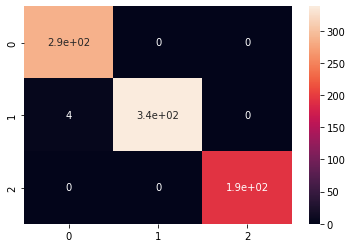

In [ ]:
svc = SVC(C=100,kernel='linear')
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
con_matrx = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, svc.predict(X_test))

train accuracy: 1.0
The accuracy of the model is : 100.0 %
Confusion Matrix:
 [[287   0   0]
 [  0 342   0]
 [  0   0 193]]
Precision =  1.0 
Recall =  1.0 
F-Score =  1.0


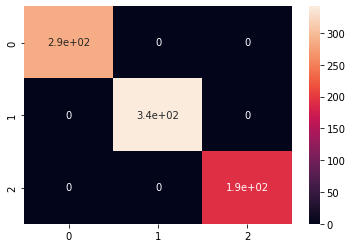

In [ ]:
svc = SVC(C=100,kernel='rbf')
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
con_matrx = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",con_matrx)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, svc.predict(X_test))

**Perceptron Algorithm**

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 1.0
Testing Accuracy : 0.9951338199513382
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       287
           1       1.00      0.99      0.99       342
           2       1.00      1.00      1.00       193

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822

[[287   0   0]
 [  4 338   0]
 [  0   0 193]]
Precision =  0.9952 
Recall =  0.9951 
F-Score =  0.9951


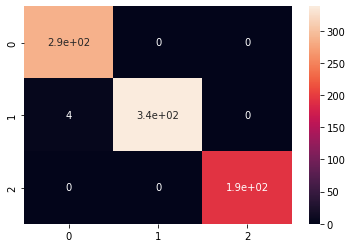

In [ ]:
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=500)
X_test,X_train,y_train,y_test=test_x,train_x,train_y,test_y
ANN_clf = MLPClassifier(hidden_layer_sizes=(50,25,2),activation='relu', solver='adam')
X_train=train_x
X_test=test_x
ANN_clf.fit(X_train,train_y)
print('Training Accuracy :',ANN_clf.score(X_train,train_y))
print('Testing Accuracy :',ANN_clf.score(X_test,test_y))
print(classification_report(test_y,ANN_clf.predict(X_test) ))
print(confusion_matrix(test_y, ANN_clf.predict(X_test)))
precision, recall, fscore, support = precision_recall_fscore_support(test_y, ANN_clf.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))
confuson_matrices(y_test, ANN_clf.predict(X_test))

100%|██████████| 499/499 [1:27:38<00:00, 10.54s/it]


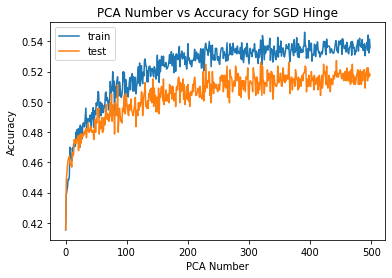

For SGD Hinge : Highest Testing Score is 0.5273390036452005 for PCA Number 445


445

In [ ]:
def PCA_Estimatorr(m,N,model_name):
  f=[]
  g=[]
  x1= TfidfVectorizer(max_features=10000).fit_transform(df['text'])
  y=df['label']
  X_train,X_test,y_train,y_test = train_test_split(x1.toarray(),y, random_state = 56,test_size=0.2,stratify=y)
  #l=range(2,x1.shape[1]+1)
  l=range(2,N+1)

  for i in tqdm(l):
    pcas = TruncatedSVD(i).fit(X_train)
    X_train1 = pcas.transform(X_train)
    X_test1 = pcas.transform(X_test)
    X_train2 = X_train1
    X_test2 = X_test1
    m.fit(X_train2,y_train)
    f.append(m.score(X_train2,y_train))
    g.append(m.score(X_test2,y_test))
  plt.plot(f, label='train')
  plt.plot(g, label='test')
  plt.xlabel("PCA Number")
  plt.ylabel("Accuracy")
  plt.title(f"PCA Number vs Accuracy for {model_name}")
  plt.legend()
  plt.show()
  fi=np.argseax(f)
  gi=np.argseax(g)
  print(f'For {model_name} : Highest Testing Score is {max(g)} for PCA Number {l[gi]}')
  return l[gi]
sgd = SGDClassifier(eta0=0.0001, alpha=0.0001, loss='hinge',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='constant')
PCA_Estimatorr(sgd,500,'SGD Hinge')

In [ ]:
lasso = SelectFromModel(SGDClassifier(eta0=0.0001, alpha=0.0001, loss='perceptron',random_state=15, penalty='elasticnet', tol=1e-3,learning_rate='constant'))
lasso.fit(train_x,train_y)
lasso.get_support()
d=0
for i in lasso.get_support():
  if i==True:
    d+=1
print('total features from the text: {}'.format((train_x.shape[1])))
print('selected features by Lasso: {}'.format(d))
print('features with coefficients shrinks to zero: {}'.format(np.sum(lasso.estimator_.coef_ == 0)))

total features from the text: 500
selected features by Lasso: 218
features with coefficients shrinks to zero: 158


In [ ]:
feature_vector=[i for i in fdist.keys()][:36861]
weight_vector = [np.mean(i) for i in c[::-1]]
fw={}
for i,j in zip(weight_vector,feature_vector):
  fw[j]=i
fw

{'able': -2.2133699674815267e-05,
 'act': -0.00027140133939785953,
 'actor': 6.54627235383928e-05,
 'advise': -0.00019344204649373675,
 'affleck': 8.581182981935602e-05,
 'afraid': 8.039083029785312e-05,
 'aim': -0.00020831186276281774,
 'alike': -0.0004128549361606073,
 'already': 2.6107816032845066e-05,
 'also': 0.00011689237713904671,
 'always': 0.00010294782412150608,
 'american': -0.0002043686777655574,
 'among': -4.2199025187768064e-05,
 'another': 4.938623265008945e-05,
 'answer': 3.014626732495974e-05,
 'anticipation': -0.00015634080819148076,
 'anyone': -0.0007981114085620629,
 'anything': 0.0,
 'anyway': 0.00033651528003518386,
 'anywhere': 0.00015552055442579485,
 'apologize': -0.0005662089320322624,
 'apparent': 0.0008217281516759151,
 'appeal': -3.948011256987335e-05,
 'around': 0.0001492382894162706,
 'art': 0.0,
 'ask': 1.2002469419525184e-05,
 'assault': -0.00020815635948775882,
 'astronomical': 0.00014863136113305175,
 'atmosphere': -0.00012517803838521624,
 'attempt':

No handles with labels found to put in legend.


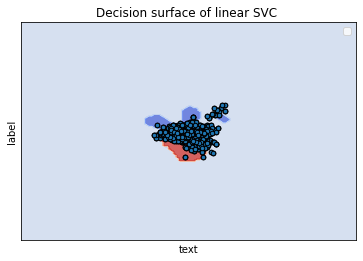

In [ ]:
X = train_x[:, [0,1]]
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
from sklearn.svm import SVC
model = SVC(kernel='rbf')
clf = model.fit(X,train_y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1,  cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('label')
ax.set_xlabel('text')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Test Accuracy for SGD with Loss is :41.6


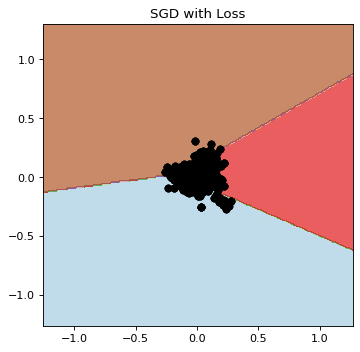

Test Accuracy for SGD with Hinge is :81.3


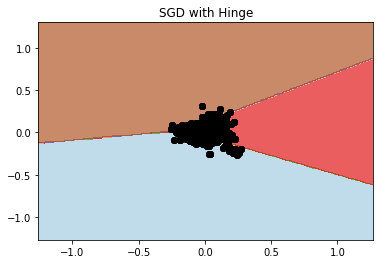

Test Accuracy for SGD with Perceptron is :92.4


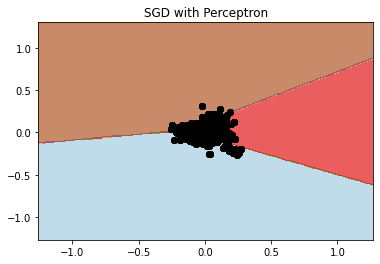

Test Accuracy for Logistic Regression is :90.1


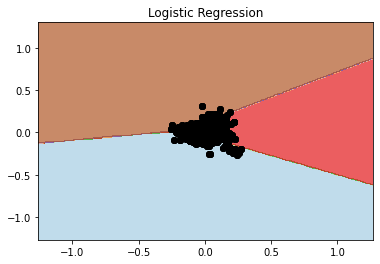

In [ ]:
LR=LR()
pcas = PCA(2).fit(train_x)
X_train1 = pcas.transform(X_train)
X_test1 = pcas.transform(test_x)
X_train1.shape,X_test1.shape
X=X_train1
y=train_y
models = [sgd1,sgdh,sgdp,LR]
names = ['SGD with Loss','SGD with Hinge','SGD with Perceptron','Logistic Regression']
plt.figure(figsize = (5,5), dpi = 80)
for i,j in zip(models,names):
    i.fit(X,y)
    print(f'Test Accuracy for {j} is :',i.score(X_test1,test_y))
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  
    h = (x_max / x_min)/100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, -h), np.arange(y_min, y_max, -h))
    
    Z = i.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1] , color='black', cmap=plt.cm.Paired)
    plt.title(f'{j}')
    plt.show()

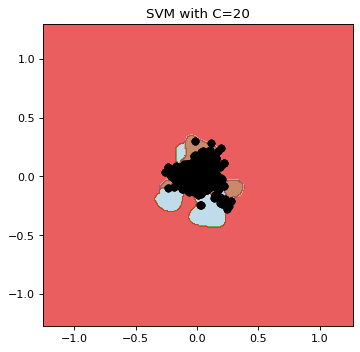

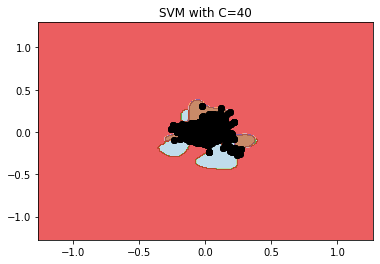

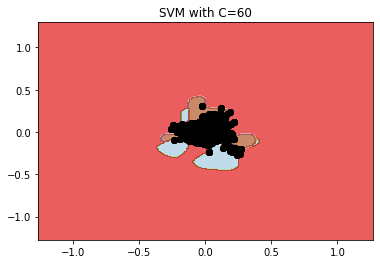

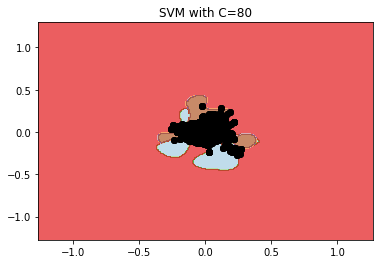

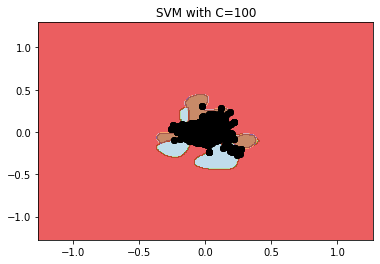

In [ ]:
pcas = PCA(2).fit(train_x)
X_train1 = pcas.transform(X_train)
X_test1 = pcas.transform(test_x)
X_train1.shape,X_test1.shape
X=X_train1
y=train_y
cr = [20,40,60,80,100]
plt.figure(figsize = (5,5), dpi = 80)
for j,i in enumerate(cr):
    svc = SVC(C=i)
    svc.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    h = (x_max / x_min)/100
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, -h), np.arange(y_min, y_max, -h))
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1] , color='black', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.title(f'SVM with C={i}')
    
    plt.show()

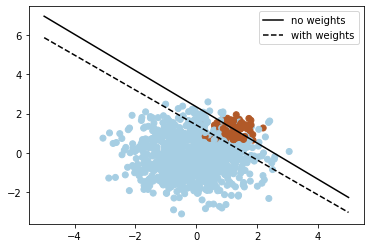

In [ ]:

# we create 40 separable points
np.random.seed(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * np.random.randn(n_samples_1, 2),
          0.5 * np.random.randn(n_samples_2, 2) + [2, 2]]
y = np.array([0] * (n_samples_1) + [1] * (n_samples_2), dtype=np.float64)
idx = np.arange(y.shape[0])
np.random.shuffle(idx)
'y=train_y[:len(y)]'
X = X[idx]
y = y[idx]
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

clf = SGDClassifier( alpha=0.01)
clf.fit(X, y)

w = clf.coef_.ravel()
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_ / w[1]



wclf = SGDClassifier( alpha=0.01, class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_.ravel()
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_ / ww[1]
pl.set_cmap(pl.cm.Paired)
h0 = pl.plot(xx, yy, 'k-', label='no weights')
h1 = pl.plot(xx, wyy, 'k--', label='with weights')
pl.scatter(X[:, 0], X[:, 1], c=y)
pl.legend()

pl.axis('tight')
pl.show()

Creating 50 seperable points

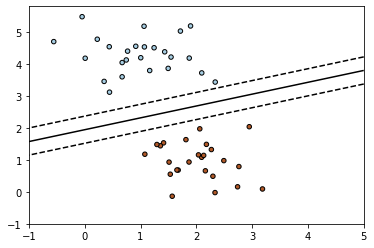

In [ ]:



X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=20)

plt.axis('tight')
plt.show()